In [3]:
import json
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
import ast
import re
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import sklearn.manifold
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import os
%matplotlib inline

ALL_GEODATA = []
counter = 0

path = 'data_cleaned/'
jsons = [jsonfile for jsonfile in os.listdir(path) if jsonfile.endswith('.json')]

# load in all json data files
for index, js in enumerate(jsons):
    with open(os.path.join(path, js)) as json_file:
        for line in json_file:
            r = json.loads(line)
            if 'coordinates' in r and r['coordinates'] != None: 
                #print('APPENDING A TWEET WITH GEOLOCATION')
                ALL_GEODATA.append(r)                
            counter += 1
            #if counter % 500 == 0: print(str(counter) + ' tweets')
                
all_geodata_df = pd.DataFrame(ALL_GEODATA)

In [5]:
# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

sid = SentimentIntensityAnalyzer()

//anaconda/envs/py35/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [25]:
# create dataframe with coordinates, the tweet text, and sentiment compound score for that tweet
latlongtext = []
for i, row in all_geodata_df.iterrows():
    lat = row['coordinates']['coordinates'][0]
    long = row['coordinates']['coordinates'][1]
    text = row['text']
    ss = sid.polarity_scores(text)['compound']
    
    entry = {'lat':lat, 'long':long, 'text':text, 'ss':ss}
    latlongtext.append(entry)

In [26]:
geosentiment_df = pd.DataFrame(latlongtext, columns=['lat', 'long', 'text', 'ss'])
geosentiment_df

,lat,long,text,ss
0,-95.990285,41.265072,I volunteered to work the Election this year. ...,0.0000
1,-121.439426,38.498479,Hmm...new stickers @ County of Sacramento Vote...,0.0000
2,-97.399470,37.710061,@JenniferHorn Absurd...Another Trump surrogate...,-0.3612
3,4.476800,50.501000,⒍ #BASF\n⒎ America\n⒏ Marc Sleen\n⒐ PostNL\n⒑ ...,0.0000
4,-79.415841,43.660267,School Crossing Detail | Harbord St &amp; Clin...,0.0000
5,19.454477,51.776511,#MaxTV Election 16: Have some fun: White House...,0.5106
6,-78.785690,43.000699,Fish Katsu Curry lunch election prediction: th...,0.3400
7,-83.505881,42.390265,Nothing to do after voting tomorrow? Come out ...,0.0000
8,-84.660098,37.863042,Dr Tennent gave a great homily at Daily Euchar...,0.6249
9,-100.000000,40.000000,#jamesfranco #voteyourfuture #imwithher #elec...,0.0000


In [28]:
geo_text_df = pd.DataFrame()
geo_text_df['text'] = [s.split() for s in geosentiment_df['text'] if isinstance(s, str)]
geo_text_df

,text
0,"[I, volunteered, to, work, the, Election, this..."
1,"[Hmm...new, stickers, @, County, of, Sacrament..."
2,"[@JenniferHorn, Absurd...Another, Trump, surro..."
3,"[⒍, #BASF, ⒎, America, ⒏, Marc, Sleen, ⒐, Post..."
4,"[School, Crossing, Detail, |, Harbord, St, &am..."
5,"[#MaxTV, Election, 16:, Have, some, fun:, Whit..."
6,"[Fish, Katsu, Curry, lunch, election, predicti..."
7,"[Nothing, to, do, after, voting, tomorrow?, Co..."
8,"[Dr, Tennent, gave, a, great, homily, at, Dail..."
9,"[#jamesfranco, #voteyourfuture, #imwithher, #e..."


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

words = set(stopwords.words('english'))
words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', 'http','https','rt']) # remove it if you need punctuation 

geo_vectorizer = TfidfVectorizer(stop_words=words, min_df=10, max_df=0.8)
geo_topics = [' '.join(strings) for strings in geo_text_df['text']]
geo_dtm = geo_vectorizer.fit_transform(geo_topics) #.toarray()

import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

geo_stemmed_data = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)  
        for sent in sent_tokenize(message)
        for word in word_tokenize(sent))
        for message in geo_topics]

geo_dtm = geo_vectorizer.fit_transform(geo_stemmed_data)
geo_terms = geo_vectorizer.get_feature_names()

Created dense dtm matrix
Created centered dtm
Ran randomized_svd and assigned u, s, vt


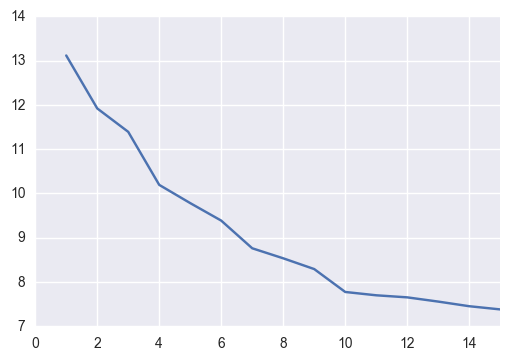

In [36]:
# # PCA / Truncated SVD to deal with sparse data

from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

geo_dtm_dense = geo_dtm.todense()
print('Created dense dtm matrix')

geo_centered_dtm = geo_dtm_dense - np.mean(geo_dtm_dense, axis=0)
print('Created centered dtm')

geo_u, geo_s, geo_vt = randomized_svd(geo_centered_dtm, n_components=15, n_iter=5, random_state=None)
print('Ran randomized_svd and assigned u, s, vt')

plt.xlim([0,15])
plt.plot(range(1,len(geo_s)+1),geo_s)

In [44]:
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD

# fit LSA with 3 principal components
geo_lsa = TruncatedSVD(4, algorithm='randomized')
geo_dtm_lsa = geo_lsa.fit_transform(geo_dtm)
geo_dtm_lsa = Normalizer(copy=False).fit_transform(geo_dtm_lsa)
# dist_matrix = 1 - cosine_similarity(dtm_lsa)

pd.DataFrame(geo_lsa.components_,index=['comp1','comp2','comp3', 'comp4'],columns=geo_terms)

,00,000,00in,01,02,03,04,04in,05,06,...,zambian,zdrt4tawy,الاماراتيه,البريطانيه,الثقافه,الجميله,اللحظات,المستغني,علي,रक
comp1,0.008188,0.002588,0.003072,0.008197,0.009609,0.005896,0.017245,0.000890,0.008870,0.011078,...,0.001958,0.004737,0.000880,0.000880,0.000880,0.000819,0.000819,0.000700,0.000838,0.001797
comp2,0.019268,0.000226,0.009427,0.023001,0.025899,0.015807,0.042496,0.002703,0.023191,0.030471,...,0.002593,0.011913,0.003368,0.003368,0.003368,0.003137,0.003137,0.002682,0.002713,0.002644
comp3,-0.014244,-0.000526,-0.000324,-0.014744,-0.015074,-0.010476,-0.014429,-0.000081,-0.014933,-0.020304,...,0.006082,-0.008948,0.001016,0.001016,0.001016,0.000947,0.000947,0.000809,0.000429,-0.006236
comp4,-0.023793,0.002815,0.001240,-0.020922,-0.023954,-0.017208,-0.048252,0.000377,-0.025382,-0.029960,...,0.001123,-0.013318,0.003726,0.003726,0.003726,0.003473,0.003473,0.002960,0.002553,-0.006619


In [54]:
for i in range(4):
    geo_top = np.argsort(geo_vt[i])[::-1]
    geo_topterms = [geo_terms[geo_top[f]] for f in range(5)]
    print(i,geo_topterms)
    print()
    
# geo_cluster_labels = {0 : 'pro-Hillary', 1 : 'genElection', 2 : 'pro-Trump', 3 : 'pro-Hillary'}

0 ['vote', 'imwithh', 'election2016', 'elect', 'co']

1 ['elect', 'day', 'us', 'trump', 'win']

2 ['trump', 'vote', 'donald', 'presid', 'win']

3 ['vote', 'clinton', 'hillari', 'us', '2016']



In [52]:
# Performing k-means on geographical data
geo_kmeans = KMeans(n_clusters=4)
geo_kmeans.fit_predict(geo_dtm_lsa)
geo_clusters = geo_kmeans.labels_.tolist()

geo_clusters

[1,
 1,
 0,
 3,
 3,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 3,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 0,
 3,
 3,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 3,
 3,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 3,
 3,
 3,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 3,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 3,
 3,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 3,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 3,
 3,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,


In [ ]:
gen = 0
hillary = 0
trump = 0
for entry in geo_clusters:
    if entry == 1:
        gen += 1
    elif entry == 2:
        trump += 1
    else:
        hillary += 1

In [68]:
ss_temp = geosentiment_df['ss']
corr_arr = []

for i in range(len(geo_clusters)):

    if geo_clusters[i] == 1:
        geo = 1
        corr_arr.append((geo, ss_temp[i]))
    elif geo_clusters[i] == 3 or geo_clusters[i] == 0:
        geo = 3
        corr_arr.append((geo, ss_temp[i]))
    
    
corr_df = pd.DataFrame(corr_arr, columns=['cluster', 'ss'])
import scipy.stats
import statistics
result_geo = scipy.stats.pearsonr(corr_df['cluster'], corr_df['ss'])
print(result_geo)

(-0.17645728362877261, 2.4033483423013606e-41)


In [58]:
geosentiment_df = pd.DataFrame(latlongtext, columns=['lat', 'long', 'ss', 'cluster'])
geosentiment_df['cluster'] = geo_clusters
geosentiment_df.T.to_json('geosentiment.json')

In [ ]:
# all_geodata_df.iloc[0]['coordinates']['coordinates']

# from geopy.geocoders import Nominatim
# import time

# geolocator = Nominatim()
# location = geolocator.reverse("52.509669, 13.376294")
# print(location.address)

# import requests 
# count = 0
# for index,row in all_geodata_df[1657:].iterrows():
#     count += 1
#     #print(entry)
#     coord = row['coordinates']['coordinates']
#     try:
#         try:
#             coord = (str(coord[1]) + ','+str(coord[0]))
#             loc = geolocator.reverse(str(coord))
#             adr = loc.address
#             time.sleep(.5)
#         except GeocoderTimedOut as e:
#             print("Error: geocode failed with message %s"%(e.msg))
#             time.sleep(1)
#             continue
#     except:
#         continue
    
#     try:
#         adr = (loc.address.split(','))

  
#         state = adr[-3]
#         country = adr[-1]
#         named_locations.append((row['coordinates']['coordinates'], state, country, row['text']))
#     except:
#         continue
        

Potsdamer Platz, Mitte, Berlin, 10117, Deutschland


1 tweets loaded from json


In [51]:
tweet_text_df = pd.DataFrame()
tweet_text_df['text'] = [s.split() for s in tweet_df['text'] if isinstance(s, str)]

In [52]:
tweet_text_df

,text
0,"[Common:, Americas, Racism, Towards, Black, Pe..."
1,"[RT, @BlancsRAM19:, If, you, support, Trump,, ..."
2,"[Comment, tu, peux, passer, de, B.Obama, a, D...."
3,"[RT, @sarcasmcall:, 5., trump, vai, impedir, q..."
4,"[RT, @GMA:, WATCH:, Hundreds, of, protesters, ..."
5,"[WTF, !!, Donald, Trump, president, !, Shockin..."
6,"[RT, @evrack:, sorry, for, holding, the, presi..."
7,"[Funny, fact:, Hillary, isn't, the, one, who, ..."
8,"[RT, @GossipRoomOff:, Donald, #Trump, succède,..."
9,"[RT, @ABCPolitics:, More, than, 1,000, CA, hig..."


In [ ]:
# sample_df = tweet_text_df.sample(n = 10000)
# sample_df

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# from nltk.corpus import stopwords
# words = set(stopwords.words('english'))
# words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', 'http','https','rt']) # remove it if you need punctuation 


# sample_vectorizer = TfidfVectorizer(stop_words=words, min_df=10, max_df=0.8)
# sample_topics = [' '.join(strings) for strings in sample_df['text']]
# sample_dtm = sample_vectorizer.fit_transform(sample_topics) #.toarray()

# import nltk
# from nltk.stem.snowball import SnowballStemmer
# from nltk.tokenize import word_tokenize, sent_tokenize

# sample_stemmed_data = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)  
#         for sent in sent_tokenize(message)
#         for word in word_tokenize(sent))
#         for message in sample_topics]

# sample_dtm = sample_vectorizer.fit_transform(sample_stemmed_data)
# sample_terms = sample_vectorizer.get_feature_names()

In [ ]:
# # PCA / Truncated SVD to deal with sparse data

# from sklearn.utils.extmath import randomized_svd
# from sklearn.decomposition import TruncatedSVD
# %matplotlib inline

# sample_dtm_dense = sample_dtm.todense()
# print('Created dense dtm matrix')

# sample_centered_dtm = sample_dtm_dense - np.mean(sample_dtm_dense, axis=0)
# print('Created centered dtm')

# sample_u, sample_s, sample_vt = randomized_svd(sample_centered_dtm, n_components=15, n_iter=5, random_state=None)
# print('Ran randomized_svd and assigned u, s, vt')

# plt.xlim([0,15])
# plt.plot(range(1,len(sample_s)+1),sample_s)


In [ ]:
# #Silhouette Score
# sample_ss = []
# sample_maxlen = len(sample_u)
# for k in range(1,20):
#     vectorsk = sample_u[:,:k] @ np.diag(sample_s[:k])
#     kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=10, random_state=0)
#     kmeans.fit_predict(vectorsk)
#     labelsk = kmeans.labels_
#     sample_ss.append(metrics.silhouette_score(vectorsk,labelsk,metric='euclidean'))
    
# plt.plot(range(1,20),sample_ss)
# plt.xlabel('No Principal Components',size=20)

In [ ]:
# this_tweet_text_df = tweet_text_df.sample(frac=.25)
# this_tweet_text_df

In [54]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.corpus import stopwords
# words = set(stopwords.words('english'))
# words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', 'http','https','rt', 'la', 'que', 'de']) # remove it if you need punctuation 

# vectorizer = TfidfVectorizer(stop_words=words, min_df=2000, max_df=0.8)
# topics = [' '.join(strings) for strings in tweet_text_df['text']]
# dtm = vectorizer.fit_transform(topics) #.toarray()

# import nltk
# from nltk.stem.snowball import SnowballStemmer
# from nltk.tokenize import word_tokenize, sent_tokenize

# stemmed_data = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)  
#         for sent in sent_tokenize(message)
#         for word in word_tokenize(sent))
#         for message in topics]

# dtm = vectorizer.fit_transform(stemmed_data)
# terms = vectorizer.get_feature_names()

In [ ]:
### Save dtm for later (access with np.load(...))
# np.save('dtm.npy', dtm)

# dtm_loaded = np.load('dtm.npy')

### Saved terms to text file just in case
# with open("terms.txt", "w") as file:
#     for item in terms:
#         file.write("%s\n" % item)

In [55]:
# terms_loaded = []
# with open('terms.txt', 'r') as file:
#     for line in file:
#         terms.append(line.replace('\n',''))
# terms_loaded
dtm

<300000x187 sparse matrix of type '<class 'numpy.float64'>'
	with 1256914 stored elements in Compressed Sparse Row format>

Created dense dtm matrix
Created centered dtm
Ran randomized_svd and assigned u, s, vt


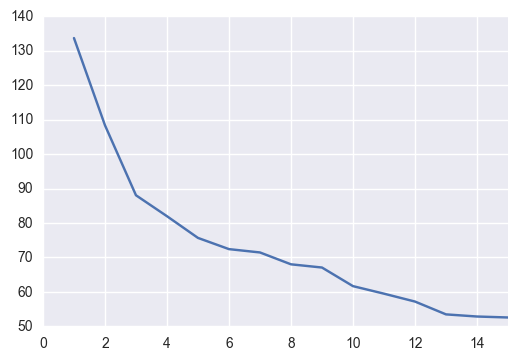

In [57]:
# # # PCA / Truncated SVD to deal with sparse data

# from sklearn.utils.extmath import randomized_svd
# from sklearn.decomposition import TruncatedSVD
# %matplotlib inline

# dtm_dense = dtm.todense()
# print('Created dense dtm matrix')

# centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
# print('Created centered dtm')

# u, s, vt = randomized_svd(centered_dtm, n_components=15, n_iter=5, random_state=None)
# print('Ran randomized_svd and assigned u, s, vt')

# plt.xlim([0,15])
# plt.plot(range(1,len(s)+1),s)



In [ ]:
# Silhouette Score
# ss = []
# maxlen = len(u)
# for k in range(1,20):
#     vectorsk = u[:,:k] @ np.diag(s[:k])
#     kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=10, random_state=0)
#     kmeans.fit_predict(vectorsk)
#     labelsk = kmeans.labels_
#     ss.append(metrics.silhouette_score(vectorsk,labelsk,metric='euclidean',sample_size=30000))
    
# plt.plot(range(1,20),ss)
# plt.xlabel('No Principal Components',size=20)

In [ ]:
# dtm = sample_dtm
# terms = sample_terms
# vt = sample_vt

In [58]:
# from sklearn.metrics.pairwise import cosine_similarity

# # fit LSA with 5 principal components
# from sklearn.preprocessing import Normalizer
# lsa = TruncatedSVD(5, algorithm='randomized')
# dtm_lsa = lsa.fit_transform(dtm)
# dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
# # dist_matrix = 1 - cosine_similarity(dtm_lsa)

# pd.DataFrame(lsa.components_,index=['comp1','comp2','comp3','comp4','comp5'],columns=terms)

,100,2016,actual,alreadi,america,american,amp,ask,back,ballot,...,white,wikileak,win,woman,women,work,world,would,ya,year
comp1,0.008191,0.016300,0.006086,0.005940,0.030862,0.016480,0.026986,0.007440,0.009625,0.006437,...,0.015932,0.009591,0.083851,0.005327,0.008626,0.007819,0.008845,0.015480,0.007740,0.013782
comp2,0.006873,0.004248,0.007284,0.005810,0.030226,0.015914,0.041206,0.006209,0.009383,0.001586,...,0.024169,-0.000621,0.114443,0.005272,0.010511,0.008150,0.008876,0.022363,0.005854,0.015445
comp3,0.018306,0.017564,0.008146,0.008524,0.036453,0.028461,0.076529,0.013481,0.011243,0.011385,...,0.016271,0.020356,0.091287,0.016444,0.013301,0.017936,0.010899,0.025717,0.000170,0.020308
comp4,-0.010725,0.042574,0.008186,0.011306,0.045132,0.029639,0.030539,0.004882,0.008081,0.011318,...,0.022085,-0.020721,0.017692,-0.001140,0.006909,0.005294,0.009737,0.013859,0.000102,0.023026
comp5,-0.015429,-0.043797,-0.001034,-0.002950,-0.014736,-0.001271,-0.000947,0.009146,-0.013221,0.009705,...,-0.007994,-0.016600,-0.118627,-0.001244,0.001480,-0.003074,-0.008309,0.001265,-0.001033,-0.024757


In [61]:
# for i in range(5):
#     top = np.argsort(vt[i])[::-1]
#     topterms = [terms[top[f]] for f in range(12)]
#     print(i,topterms)
#     print()
    
# # labels = {0 : pro-Clinton, 1 : anti-Trump, 2 : pro-Trump & anti-Hillary, 3 : go vote, 4 : general election}

0 ['co', 'electionday', 'election2016', 'via', 'imwithh', 'video', 'victori', 'wikileak', 'twitter', 'debat', '2016', 'news']

1 ['trump', 'donald', 'co', 'presid', 'win', 'se', 'fuck', 'support', 'president', 'en', 'el', 'electionnight']

2 ['hillari', 'clinton', 'vote', 'trump', 'co', 'lie', 'win', 'support', 'wikileak', 'campaign', 'email', 'bill']

3 ['vote', 'electionday', 'trump', 'election2016', 'co', 'today', 'cast', 'imwithh', 'peopl', 'get', 'pleas', 'go']

4 ['elect', 'vote', 'hillari', 'trump', 'day', 'clinton', 'co', 'donald', 'result', '2016', 'tomorrow', 'us']



In [17]:
# # Evaluating number of clusters for k-means

# k = 10
# kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10,random_state=0)
# kmeans.fit_predict(dtm_lsa)
# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_
# error = kmeans.inertia_

# # Evaluate clusters for K-Means++ Clustering
# kmeans = KMeans(init='k-means++', n_clusters=10, n_init=100)
# kmeans.fit_predict(dtm_lsa)
# labels = kmeans.labels_

# # Evaluate number of clusters with silhouette coefficient
# scoeff = metrics.silhouette_score(dtm_lsa, labels, metric='euclidean')
# print(scoeff)

# def sc_evaluate_clusters(X,max_clusters):
#     s = np.zeros(max_clusters+1)
#     s[0] = 0;
#     s[1] = 0;
#     for k in range(2,max_clusters+1):
#         kmeans = KMeans(init='k-means++', n_clusters=k, n_init=20)
#         kmeans.fit_predict(dtm_lsa)
#         s[k] = metrics.silhouette_score(dtm_lsa,kmeans.labels_,metric='cosine')
#     plt.plot(range(2,len(s)),s[2:])
#     plt.xlabel('Number of clusters')
#     plt.ylabel('Silhouette Score')
#     plt.show()
    
# sc_evaluate_clusters(dtm_lsa,10)